<a href="https://colab.research.google.com/github/erwincarlogonzales/CodingDojo/blob/main/Gradient_Boosting_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import missingno as mno

# preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display = 'diagram')

# ML model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
# load file
filename = '/content/drive/MyDrive/Colab Notebooks/train.csv'
df = pd.read_csv(filename)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

In [ ]:
# check the dataset shape
df.shape

(1460, 81)

In [ ]:
# check datatypes
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
# check statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# check for duplicates
df.duplicated().sum()

0

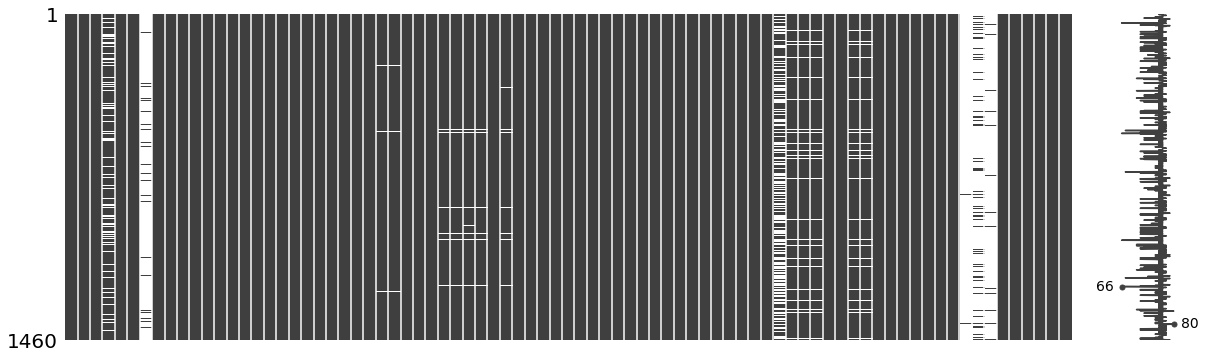

In [ ]:
# check for missing values
mno.matrix(df, figsize = (20, 6));

In [ ]:
df.isna().sum().sum()

6965

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# drop columns
df.drop(columns = ['MiscFeature',
        'MiscVal',
        'PoolArea',
        'PoolQC',
        'Fence',
        'Alley',
        'LowQualFinSF',
        '3SsnPorch',
        'ScreenPorch',
        'GarageYrBlt',
        'Street',
        'Utilities',
        'LandSlope',
        'BsmtHalfBath',
        'YrSold',
        'YearBuilt',
        'YearRemodAdd',
        'OverallQual',
        'OverallCond',
        'MoSold',], inplace = True)

In [ ]:
# check missing values
df.isna().sum().sum()

1477

In [ ]:
df.columns[df.isna().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [ ]:
df['GarageCars'].fillna(1)

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64

In [ ]:
df['GarageArea'].fillna(int(df['GarageArea'].mean()), inplace=True)

# Data Preparation

In [ ]:
# feature encoding
df['CentralAir'] = df['CentralAir'].replace({'Y': 1,'N': 0})

In [ ]:
# determine target y and features X
y = df['SalePrice']
X = df.drop(columns = 'SalePrice')

X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,2,548,TA,TA,Y,0,61,0,WD,Normal
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,2,460,TA,TA,Y,298,0,0,WD,Normal
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,2,608,TA,TA,Y,0,42,0,WD,Normal
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,3,642,TA,TA,Y,0,35,272,WD,Abnorml
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,3,836,TA,TA,Y,192,84,0,WD,Normal


In [ ]:
# instantiate column selectors
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [ ]:
# map categorical values into numbers

# for each categorical columns
cat_data = X[cat_selector(X)]

# for each categorical columns
for col_name in cat_data.columns:
    
    # print the column name
    print(col_name)

    # get unique values from that column
    values_list = df[col_name].unique()

    # initialize the dictionary (mapper)
    col_dictionary = dict()

    # for each value in that column
    for index, value in enumerate(values_list):
        
        # display the index(position) and value
        #print(index, value)

        # add the 'value: index' to the dictionary
        col_dictionary[value] = index

    #print(col_dictionary)

    # replace values in that column
    X[col_name].replace(col_dictionary, inplace=True)

MSZoning
LotShape
LandContour
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# instantiate encoder
# ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# instantiate scaler
scaler = StandardScaler()

# imputer
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

In [ ]:
# create pipeline
cat_pipe = make_pipeline(freq_imputer)
num_pipe = make_pipeline(mean_imputer, scaler)

In [ ]:
# set tuples
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)

In [ ]:
# instantiate transformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [ ]:
preprocessor.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2328ffdc90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2328ffd210>)])

In [ ]:
# transform processed data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Machine Learning Model

In [ ]:
# define a function that takes true and predicted values as arguments
# and prints all 4 metrics

def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [ ]:
%%time
# instantiate model
rfr = RandomForestRegressor()

# fit the model for target y
rfr.fit(X_train_processed, y_train)

# evaluate the model
train_score = rfr.score(X_train_processed, y_train)
test_score = rfr.score(X_test_processed, y_test)

# print scores
print(f'rfr training accuracy: {train_score}')
print(f'rfr testing accuracy: {test_score}')

rfr training accuracy: 0.9745298622340431
rfr testing accuracy: 0.8741036017454247
CPU times: user 1.95 s, sys: 13.5 ms, total: 1.96 s
Wall time: 2.34 s


In [ ]:
%%time
n_estimators = [50, 75, 100]
max_depth = [13, 16, 19]
max_leaf_nodes = [8, 10, 12]

params = {'n_estimators': n_estimators,
           'max_depth': max_depth,
           'max_leaf_nodes': max_leaf_nodes}

gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(estimator = gbr, param_grid = params, cv = 5, n_jobs = -1)
gbr_grid.fit(X_train_processed, y_train)

train_score = gbr_grid.score(X_train_processed, y_train)
test_score = gbr_grid.score(X_test_processed, y_test)

print(f'gbr training accuracy: {train_score}')
print(f'gbr testing accuracy: {test_score}')

gbr training accuracy: 0.9678556860269258
gbr testing accuracy: 0.8825545555257854
CPU times: user 1.93 s, sys: 160 ms, total: 2.09 s
Wall time: 1min 10s


In [ ]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gbr_grid.best_params_

{'max_depth': 13, 'max_leaf_nodes': 10, 'n_estimators': 75}

# New Predictions

In [ ]:
# load data
filename = '/content/drive/MyDrive/Colab Notebooks/test.csv'
test = pd.read_csv(filename)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# preprocessing test data

In [ ]:
# drop columns
test.drop(columns = ['MiscFeature',
        'MiscVal',
        'PoolArea',
        'PoolQC',
        'Fence',
        'Alley',
        'LowQualFinSF',
        '3SsnPorch',
        'ScreenPorch',
        'GarageYrBlt',
        'Street',
        'Utilities',
        'LandSlope',
        'BsmtHalfBath',
        'YrSold',
        'YearBuilt',
        'YearRemodAdd',
        'OverallQual',
        'OverallCond',
        'MoSold',], inplace = True)

In [ ]:
# map categorical values into numbers
# for each categorical columns
cat_data = test[cat_selector(test)]

# for each categorical columns
for col_name in cat_data.columns:
    
    # print the column name
    print(col_name)

    # get unique values from that column
    values_list = test[col_name].unique()

    # initialize the dictionary (mapper)
    col_dictionary = dict()

    # for each value in that column
    for index, value in enumerate(values_list):
        
        # display the index(position) and value
        #print(index, value)

        # add the 'value: index' to the dictionary
        col_dictionary[value] = index

    #print(col_dictionary)

    # replace values in that column
    test[col_name].replace(col_dictionary, inplace=True)

MSZoning
LotShape
LandContour
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
test['GarageCars'].fillna(1)

0       1.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1454    0.0
1455    1.0
1456    2.0
1457    0.0
1458    3.0
Name: GarageCars, Length: 1459, dtype: float64

In [ ]:
test['GarageArea'].fillna(int(test['GarageArea'].mean()), inplace=True)

# Preprocessing test data

In [ ]:
# feature encoding
test['CentralAir'] = test['CentralAir'].replace({'Y': 1,'N': 0})

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   LotConfig      1459 non-null   int64  
 8   Neighborhood   1459 non-null   int64  
 9   Condition1     1459 non-null   int64  
 10  Condition2     1459 non-null   int64  
 11  BldgType       1459 non-null   int64  
 12  HouseStyle     1459 non-null   int64  
 13  RoofStyle      1459 non-null   int64  
 14  RoofMatl       1459 non-null   int64  
 15  Exterior1st    1459 non-null   int64  
 16  Exterior2nd    1459 non-null   int64  
 17  MasVnrType     1459 non-null   int64  
 18  MasVnrAr

In [ ]:
# instantiate column selectors
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

# instantiate encoder
# ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# instantiate scaler
scaler = StandardScaler()

# imputer
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

# create pipeline
cat_pipe = make_pipeline(freq_imputer)
num_pipe = make_pipeline(mean_imputer, scaler)

# set tuples
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)

# instantiate transformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

preprocessor.fit(test)

# transform processed data
test_processed = preprocessor.transform(test)

In [ ]:
test_processed

array([[-1.73086406, -0.87471081, -2.00792273, ..., -0.3607383 ,
        -0.31916897, -0.39320311],
       [-1.72848977, -0.87471081, -0.46604943, ..., -0.3607383 ,
        -0.31916897, -0.39320311],
       [-1.72611547,  0.06135085, -0.46604943, ..., -0.3607383 ,
        -0.31916897, -0.39320311],
       ...,
       [ 1.72611547, -0.87471081, -0.46604943, ..., -0.3607383 ,
        -0.31916897,  2.07956991],
       [ 1.72848977,  0.64638939, -0.46604943, ..., -0.3607383 ,
        -0.31916897, -0.39320311],
       [ 1.73086406,  0.06135085, -0.46604943, ..., -0.3607383 ,
        -0.31916897, -0.39320311]])

# Machine Learning Model

In [ ]:
# predict target prices
preds = gbr_grid.predict(test_processed)
preds

array([151972.86908059, 197805.90988285, 202519.98728785, ...,
       188343.76384657, 131106.21693676, 235367.38881368])

In [ ]:
# submit predictions
to_submit = pd.DataFrame({'Id': test['Id'], 'SalePrice': preds})
to_submit.head()

,Id,SalePrice
0,1461,151972.869081
1,1462,197805.909883
2,1463,202519.987288
3,1464,196593.900647
4,1465,158708.544729
